In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("diamonds.csv")

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Preprocessing

In [5]:
df.shape


(50000, 10)

In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
print(df. cut.unique())
print(df. color.unique())
print(df. clarity.unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [11]:
#values count of categorical variables
print(df.cut.value_counts())
print(df.color.value_counts())
print(df.clarity.value_counts())

Ideal        19938
Premium      12806
Very Good    11204
Good          4557
Fair          1495
Name: cut, dtype: int64
G    10452
E     9085
F     8864
H     7711
D     6224
I     5058
J     2606
Name: color, dtype: int64
SI1     12115
VS2     11404
SI2      8519
VS1      7579
VVS2     4694
VVS1     3369
IF       1632
I1        688
Name: clarity, dtype: int64


## Exploratory Data Analysis

<AxesSubplot:xlabel='price', ylabel='Count'>

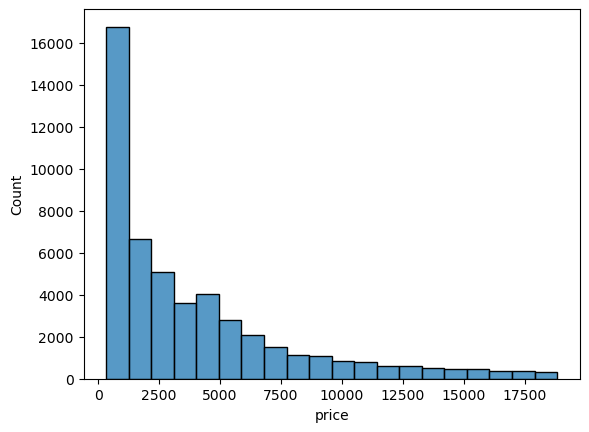

In [12]:
sns.histplot(df['price'],bins = 20)

<AxesSubplot:xlabel='carat', ylabel='Count'>

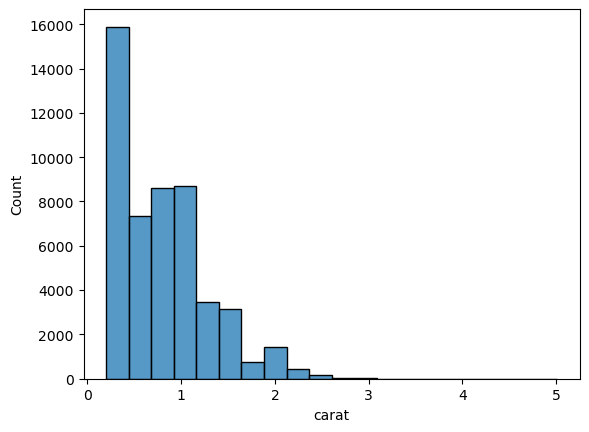

In [13]:
sns.histplot(df['carat'],bins=20)

##### Most of the diamonds are less then 1 carat in weight.

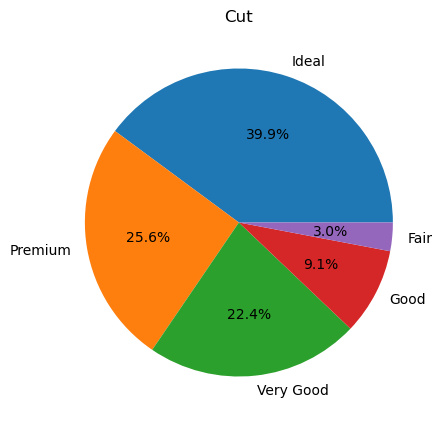

In [14]:
plt.figure(figsize=(5,5))
plt.pie(df['cut'].value_counts(),labels=['Ideal','Premium','Very Good','Good','Fair'],autopct='%1.1f%%')
plt.title('Cut')
plt.show()

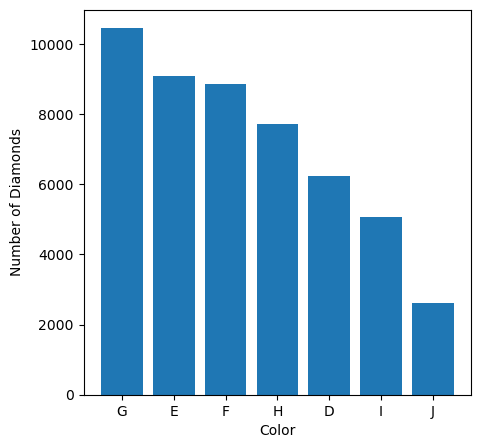

In [15]:
plt.figure(figsize=(5,5))
plt.bar(df['color'].value_counts().index,df['color'].value_counts())
plt.ylabel("Number of Diamonds")
plt.xlabel("Color")
plt.show()

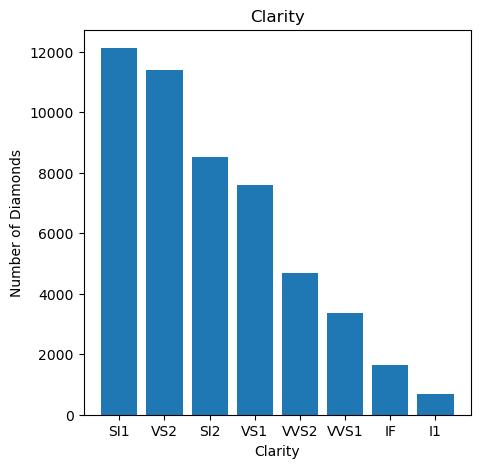

In [16]:
plt.figure(figsize=(5,5))
plt.bar(df['clarity'].value_counts().index,df['clarity'].value_counts())
plt.title('Clarity')
plt.ylabel("Number of Diamonds")
plt.xlabel("Clarity")
plt.show()

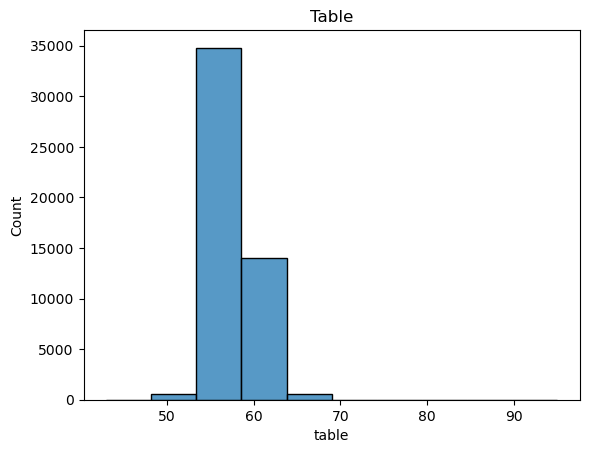

In [17]:
sns.histplot(df['table'],bins=10)
plt.title('Table')
plt.show()

## Comparing Diamond's features with Price

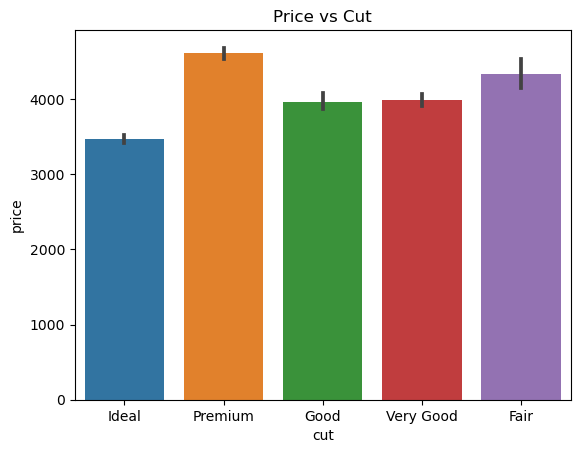

In [18]:
sns.barplot(x='cut',y='price',data=df)
plt.title('Price vs Cut')
plt.show()

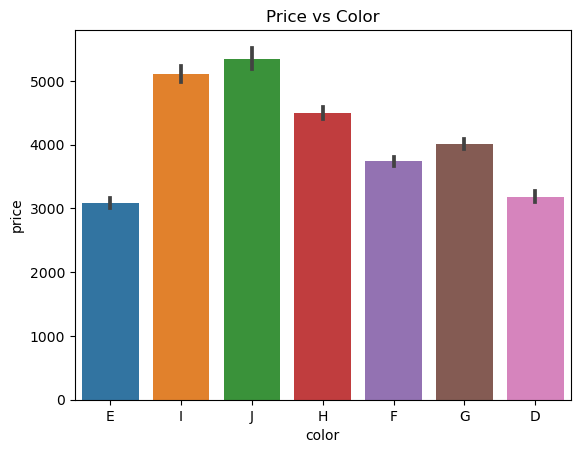

In [19]:
sns.barplot(x='color',y='price',data=df)
plt.title('Price vs Color')
plt.show()

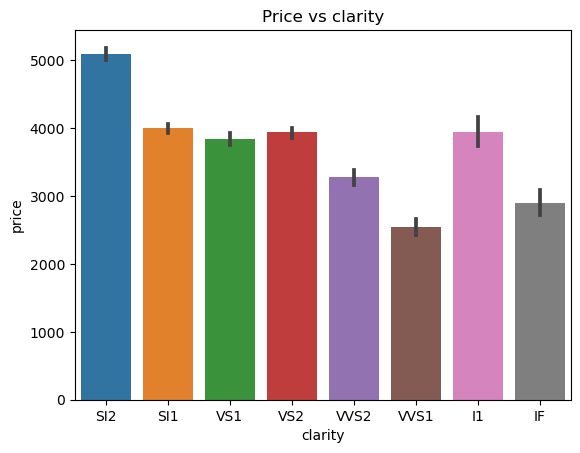

In [20]:
sns.barplot(x = 'clarity', y = 'price', data = df)
plt.title('Price vs clarity')
plt.show()

###### J color and I1 clarity are worst featiures for a diamond, however when the data is plotted on bar graph, it is seen that the price of diamonds with J color and I1 clarity is higher than the price of diamonds with D color and IF clarity, which is opposite to what I expected.

### Data Preprocessing 2

In [21]:

#changing categorical variables to numerical variables
df['cut'] = df['cut'].map({'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1})
df['color'] = df['color'].map({'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1})
df['clarity'] = df['clarity'].map({'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1})

In [22]:
df['cut'].head()

0    5
1    4
2    2
3    4
4    2
Name: cut, dtype: int64

### Coorelation

In [23]:
df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.135135,-0.291530,-0.352435,0.027734,0.183639,0.921804,0.975037,0.950035,0.952700
cut,-0.135135,1.000000,0.019548,0.189024,-0.223898,-0.432154,-0.053537,-0.125738,-0.121335,-0.149830
color,-0.291530,0.019548,1.000000,-0.026056,-0.047426,-0.027513,-0.172629,-0.270529,-0.263395,-0.268388
clarity,-0.352435,0.189024,-0.026056,1.000000,-0.067329,-0.159967,-0.146941,-0.371355,-0.357226,-0.366218
depth,0.027734,-0.223898,-0.047426,-0.067329,1.000000,-0.293012,-0.012731,-0.025563,-0.029809,0.094337
table,0.183639,-0.432154,-0.027513,-0.159967,-0.293012,1.000000,0.129848,0.197198,0.185248,0.153161
price,0.921804,-0.053537,-0.172629,-0.146941,-0.012731,0.129848,1.000000,0.884919,0.864393,0.860963
x,0.975037,-0.125738,-0.270529,-0.371355,-0.025563,0.197198,0.884919,1.000000,0.972977,0.970122
y,0.950035,-0.121335,-0.263395,-0.357226,-0.029809,0.185248,0.864393,0.972977,1.000000,0.950030
z,0.952700,-0.149830,-0.268388,-0.366218,0.094337,0.153161,0.860963,0.970122,0.950030,1.000000


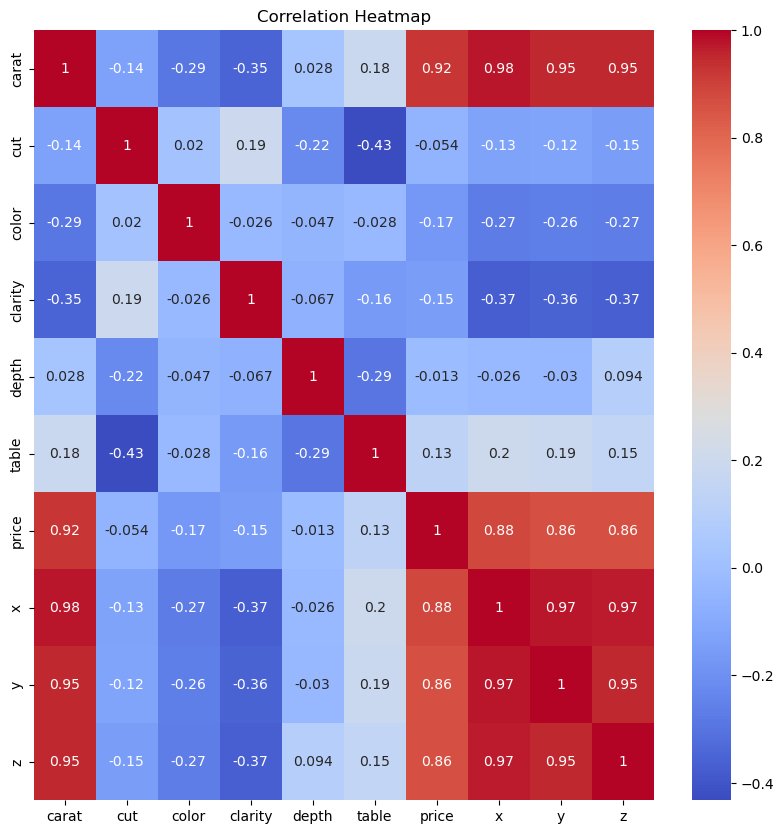

In [24]:
#plotting the correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Ploting the relationship between Price and Carat

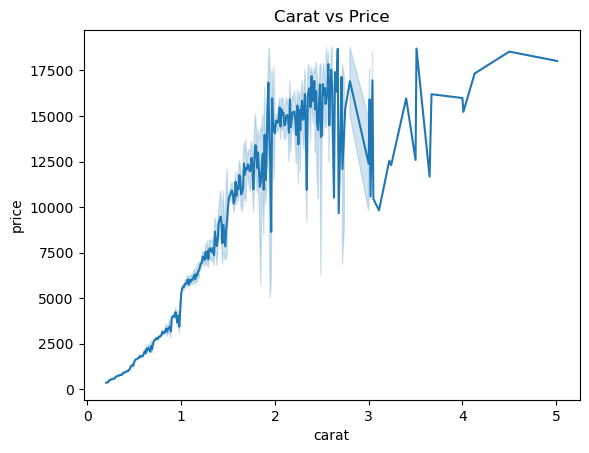

In [25]:
sns.lineplot(x='carat',y='price',data=df)
plt.title('Carat vs Price')
plt.show()

From the lineplot it is quite clear that the price of the diamond increases with the increase in the carat of the diamond. However, diamonds with less carat also have high price. This is because of the other factors that affect the price of the diamond.

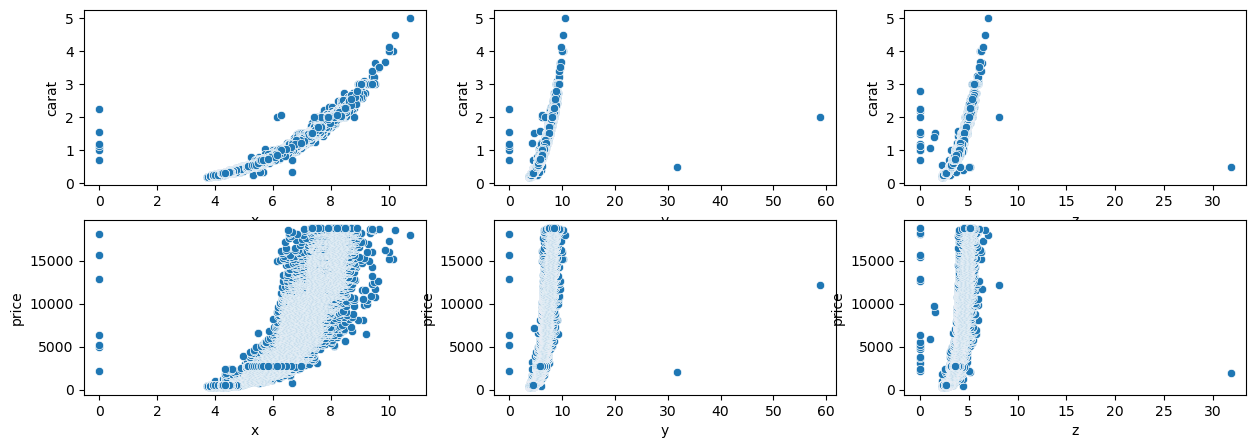

In [26]:
fig, ax = plt.subplots(2,3,figsize=(15,5))
sns.scatterplot(x='x',y='carat',data=df, ax=ax[0,0])
sns.scatterplot(x='y',y='carat',data=df, ax=ax[0,1])
sns.scatterplot(x='z',y='carat',data=df, ax=ax[0,2])
sns.scatterplot(x='x',y='price',data=df, ax=ax[1,0])
sns.scatterplot(x='y',y='price',data=df, ax=ax[1,1])
sns.scatterplot(x='z',y='price',data=df, ax=ax[1,2])
plt.show()

###### Majority of the diamonds have x values between 4 and 8, y values between 4 and 10 and z values between 2 and 6. Diamonds with other dimensions are very rare.


## Train Test Split

In [27]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [28]:
x= df.drop("price", axis=1)


In [29]:
x

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,5,6,2,61.5,55.0,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
49995,0.72,5,7,3,60.8,57.0,5.75,5.76,3.50
49996,0.72,2,7,3,63.1,55.0,5.69,5.75,3.61
49997,0.70,3,7,3,62.8,60.0,5.66,5.68,3.56
49998,0.86,4,3,2,61.0,58.0,6.15,6.12,3.74


In [30]:
y=df["price"]

In [49]:
x=np.array(df[["carat","cut","color","depth","table","x","y","z"]])

In [50]:
y=np.array(df[["price"]])

In [31]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
49995    2757
49996    2757
49997    2757
49998    2757
49999    2757
Name: price, Length: 50000, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train = train_test_split(df.drop('price',axis=1),df['price'],test_size=0.2,random_state=42)
#x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.2,random_state=42)

### Model Building
#### Decision Tree Regressor

In [67]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt

DecisionTreeRegressor()

In [68]:
#training the model
dt.fit(x_train,y_train)
#train accuracy
dt.score(x_train,y_train)

0.9999995617234543

In [69]:
#predicting the test set
dt_pred = dt.predict(x_test)

### Random Forest Regressor

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf

RandomForestRegressor()

In [71]:
#training the model
rf.fit(x_train,y_train)
#train accuracy
rf.score(x_train,y_train)

0.9970668632421122

In [72]:
#predicting the test set
rf_pred = rf.predict(x_test)

### Model Evaluation

In [73]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

#### Decision Tree Regressor

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


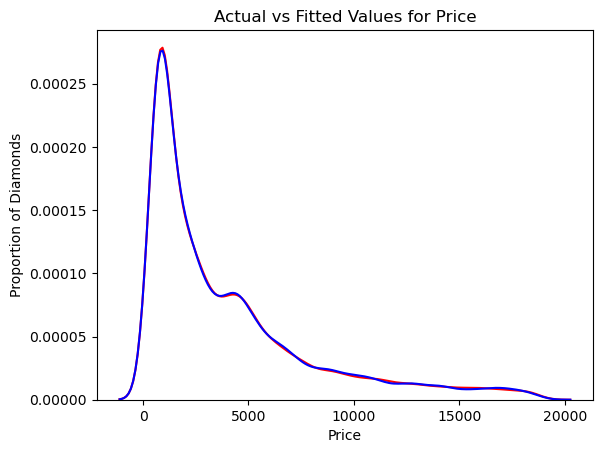

In [74]:
#distribution plot for actual and predicted values
ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(dt_pred,hist=False,color='b',label='Fitted Values',ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

In [75]:
print('Decision Tree Regressor RMSE:',np.sqrt(mean_squared_error(y_test,dt_pred)))
print('Decision Tree Regressor Accuracy:',dt.score(x_test,y_test))
print('Decision Tree Regressor MAE:',mean_absolute_error(y_test,dt_pred))

Decision Tree Regressor RMSE: 815.2355474914904
Decision Tree Regressor Accuracy: 0.9587554848467807
Decision Tree Regressor MAE: 413.4070375


### Random Forest Regressor

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


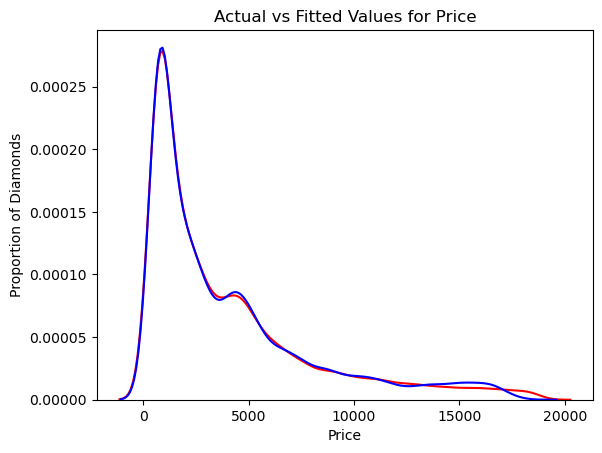

In [76]:
#distribution plot for actual and predicted values
ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(rf_pred,hist=False,color='b',label='Fitted Values',ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

In [77]:
print('Random Forest Regressor RMSE:',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('Random Forest Regressor Accuracy:',rf.score(x_test,y_test))
print('Random Forest Regressor MAE:',mean_absolute_error(y_test,rf_pred))

Random Forest Regressor RMSE: 619.4910067402634
Random Forest Regressor Accuracy: 0.9761839354914216
Random Forest Regressor MAE: 305.9273499892857


In [78]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


### Conclusion
Both the models have almost same accuracy. However, the Random Forest Regressor model is slightly better than the Decision Tree Regressor model.

There is something interesting about the data. The price of the diamonds with J color and I1 clarity is higher than the price of the diamonds with D color and IF clarity which couldn't be explained by the models. This could be because of the other factors that affect the price of the diamond.

In [79]:
print("Diamon Price")
a= float(input("Enter the carat: "))
b= int(input("Enter the Cut ('Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1):"))
c = int(input("Enter the color('D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1): "))
d = int(input("Enter the clarity('IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1 ):"))
e= float(input("Enter the depth: "))
f= float(input("Enter the table: "))
g= float(input("Enter the x: "))
h= float(input("Enter the y: "))
i= float(input("Enter the z: "))
features = np.array([[a, b, c, d, e, f, g, h, i]])
print("Diamon Price: ", rf.predict(features))


Diamon Price
Enter the carat: 0.23
Enter the Cut ('Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1):5
Enter the color('D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1): 6
Enter the clarity('IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1 ):2
Enter the depth: 61.5
Enter the table: 55.0
Enter the x: 3.95
Enter the y: 3.98
Enter the z: 2.43
Diamon Price:  [486.75]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
